# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


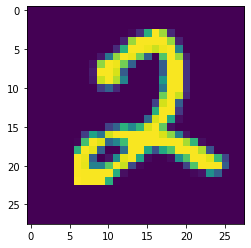

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[58923])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(Convolution2D(10, 6))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        1040      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 16)         

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 33s 546us/step - loss: 0.1769 - acc: 0.9443
Epoch 2/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0625 - acc: 0.9818
Epoch 3/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.0468 - acc: 0.9855
Epoch 4/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.0403 - acc: 0.9872
Epoch 5/10
60000/60000 [==============================] - 26s 437us/step - loss: 0.0330 - acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0279 - acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.0259 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0219 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 27s 447us/step - loss: 0.0205 - acc: 0.9933
Epoch 10/10
60000/60000 [==============================] - 26s 439us/step 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.029716565811696637, 0.9907]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[3.97163274e-10 6.71463773e-09 1.13505223e-06 1.26908935e-06
  1.12513902e-14 2.85561841e-09 9.85069333e-15 9.99997616e-01
  5.25653565e-09 5.82901816e-09]
 [4.96137488e-07 9.70096335e-06 9.99925613e-01 1.93293715e-07
  9.39685663e-08 1.86868201e-10 5.15926004e-05 1.21318467e-11
  1.21057983e-05 4.29734515e-09]
 [2.78197763e-06 9.99842048e-01 1.35202181e-05 7.93047317e-09
  1.62050110e-05 4.95747081e-05 5.58668035e-05 5.97097198e-07
  1.90921837e-05 1.60749138e-07]
 [9.99996066e-01 8.46997888e-11 5.57879964e-10 6.66557365e-10
  7.12372605e-10 2.15775198e-09 3.55906377e-06 3.52619193e-13
  2.74681575e-08 3.31680951e-07]
 [1.49802571e-14 6.43649847e-13 7.33250808e-13 4.08519518e-14
  9.99999404e-01 1.35855763e-13 1.08278247e-11 8.99734898e-10
  1.09583400e-08 5.75925640e-07]
 [2.06675736e-07 9.99975085e-01 2.93798826e-06 8.36651234e-11
  1.10976798e-05 3.65319806e-07 5.60991566e-06 4.87437148e-07
  4.11461679e-06 1.45599586e-08]
 [1.05175171e-17 4.47452948e-07 4.78736638e-07 8.94830564e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

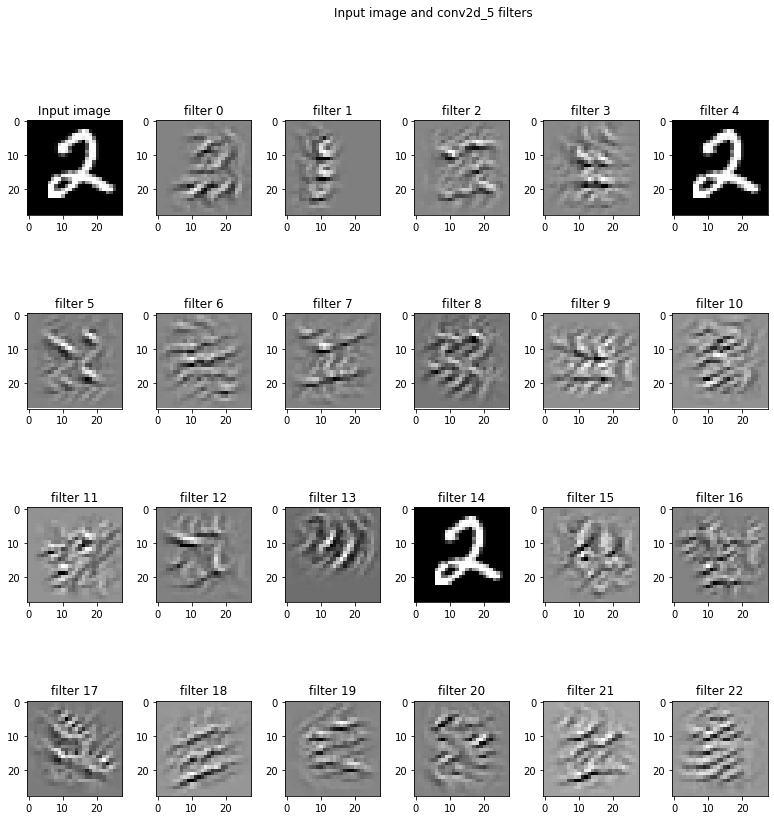

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[58923]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()